## Estadística Aplicada 

Sesion 9b - 12 Septiembre

Bárbara Govea Serna 1902869

Grupo 42


In [2]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
from lifelines import CoxPHFitter
import seaborn as sns

In [4]:
df_cancer = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/cancer.csv')

In [5]:
df_cancer.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


Los datos constan de 228 observaciones y 10 variables/columnas. La descripción de las variables es la siguiente:

inst: código de institución\

**time (d1)**: tiempo de supervivencia en días\

**status (d2)**: estado de censura 1 = censurado, 2 = muerto\

**age (i1)**: Edad en años\

**sex (i2)**: Masculino = 1 Femenino = 2\

**ph.ecog (i3)**: puntuación de rendimiento ECOG según la calificación del médico. 0 = asintomático, 1 = sintomático pero completamente ambulatorio, 2 = en cama <50% del día, 3 = en cama > 50% del día pero no encamado, 4 = encamado\

**ph.karno (i4)**: puntuación de desempeño de Karnofsky (mala = 0; buena = 100) calificada por el médico\

**pat.karno (i4)**: puntuación de rendimiento de Karnofsky según la calificación del paciente\

**meal.cal (i5)**: Calorías consumidas en las comidas\

**wt.loss (i6)**: Pérdida de peso en los últimos seis meses

In [6]:
## Depurar y estadísticas descriptivas
## recodificar variables dummy

df_cancer['status'] = df_cancer['status'] - 1
df_cancer['sex'] = df_cancer['sex'] - 1

## status 0: censurado, 1: muerto
# sex 0: hombre, 1:mujer

In [7]:
##borrar variable inst
df_cancer = df_cancer.drop('inst', axis = 1)

In [8]:
## verificar que todas las variables sean numericas
df_cancer.dtypes

## todas las variables son númericas (enteras y decimales)

time           int64
status         int64
age            int64
sex            int64
ph.ecog      float64
ph.karno     float64
pat.karno    float64
meal.cal     float64
wt.loss      float64
dtype: object

In [9]:
## contar los valores perdidos/faltantes (missing values)
df_cancer.isnull().sum()

time          0
status        0
age           0
sex           0
ph.ecog       1
ph.karno      1
pat.karno     3
meal.cal     47
wt.loss      14
dtype: int64

Cuando hay valores perdidos hay dos opciones:
1. Eliminar las observaciones con valores perdidos.
2. Imputar datos (promedio).

In [10]:
## Asignar a los valores el valor promedio de la variable
df_cancer['ph.karno'] = df_cancer['ph.karno'].fillna(df_cancer['ph.karno'].mean)
df_cancer['pat.karno'] = df_cancer['pat.karno'].fillna(df_cancer['pat.karno'].mean)
df_cancer['meal.cal'] = df_cancer['meal.cal'].fillna(df_cancer['meal.cal'].mean)
df_cancer['wt.loss'] = df_cancer['wt.loss'].fillna(df_cancer['wt.loss'].mean)
df_cancer = df_cancer.dropna()
df_cancer['ph.ecog'] = df_cancer['ph.ecog'].astype('int64')

In [11]:
## Estdística descriptiva

df_cancer.describe()

,time,status,age,sex,ph.ecog
count,227.000000,227.000000,227.000000,227.000000,227.000000
mean,306.264317,0.722467,62.458150,0.396476,0.951542
std,210.532764,0.448771,9.092045,0.490246,0.717872
min,5.000000,0.000000,39.000000,0.000000,0.000000
25%,168.500000,0.000000,56.000000,0.000000,0.000000
50%,259.000000,1.000000,63.000000,0.000000,1.000000
75%,399.000000,1.000000,69.000000,1.000000,1.000000
max,1022.000000,1.000000,82.000000,1.000000,3.000000


In [12]:
df_cancer['sex'].value_counts()

sex
0    137
1     90
Name: count, dtype: int64

El 39.47% son mujeres, el 72.36% de las personas fallecieron, la edad promedio es de 62 años, la edad mas joven es 39 y la edad mas vieja es 82. 
La media ph.karno es mayor a la media de pat.karno que significa que los pacientes consideran su estado de salud mucho peor de lo que realmente es.

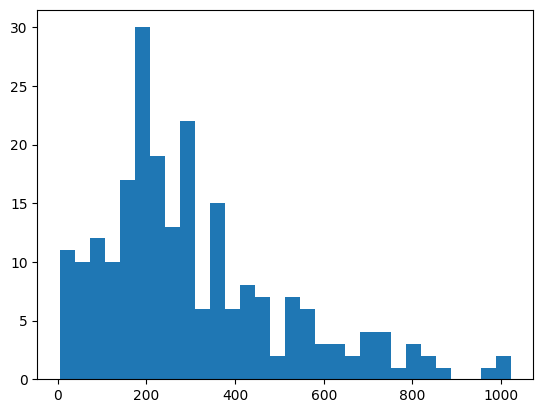

In [13]:
## Histograma del tiempo de supervivencia
plt.hist(df_cancer['time'], bins = 30);

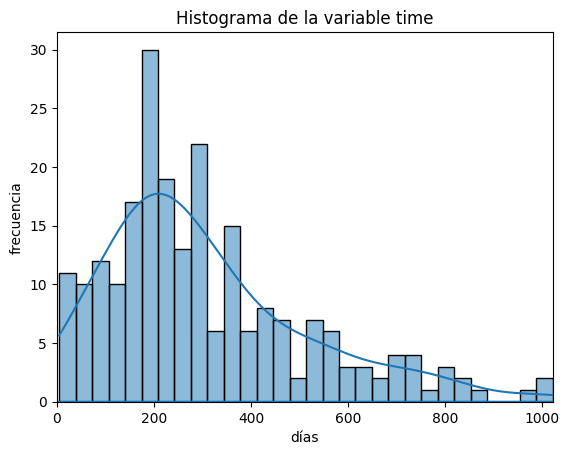

In [14]:
sns.histplot(df_cancer['time'], bins = 30, kde = True);
sns.kdeplot(df_cancer['time']);
plt.xlim(0, 1022);
plt.xlabel('días')
plt.ylabel('frecuencia')
plt.title('Histograma de la variable time');

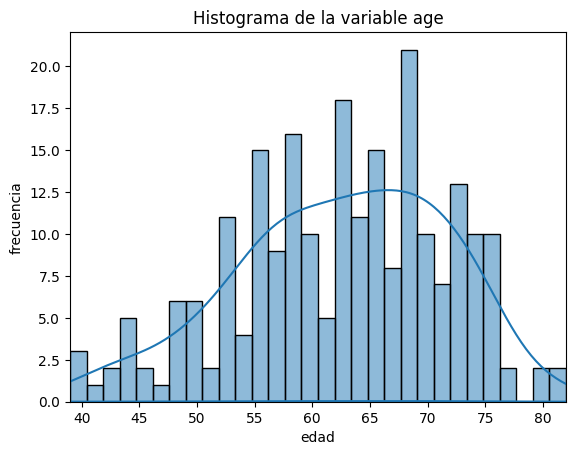

In [15]:
sns.histplot(df_cancer['age'], bins = 30, kde = True);
sns.kdeplot(df_cancer['age']);
plt.xlim(39, 82);
plt.xlabel('edad')
plt.ylabel('frecuencia')
plt.title('Histograma de la variable age');

In [ ]:
## estimar el modelo
cph1 = CoxPHFitter()
cph1.fit(df_cancer,'time','status')
cph1.print_summary()

TypeError: float() argument must be a string or a real number, not 'method'

age: $p-value = 0.18$ por tanto no rechazamos $H_0$, age no tiene efecto en el riesgo de morir de cáncer.

sex: $p-valor < \alpha$, entonces rechazamos $H_0$, ser mujer reduce el riesgo de morir de cáncer.

ph.karno: $p-value = 10$, entonces no rechazamos $H_0$, ph.karno no tiene efecto sobre el riesgo de morir de cáncer.

pat.karno: $p-value = 0.08 > \alpha$, entonces no rechazamos $H_0$, pues no tiene efecto sobre el riesgo de morir de cáncer.

E igualmente para meal y wt.loss.

ph.ecog: (suponer que es un númerico y no es categorico) rechazamos $H_0$, pues aumenta el riesgo de morir de cáncer en un 85% respecto a la categoría anterior.

## Cargar nueva base

In [17]:
from lifelines.datasets import load_rossi

rossi = load_rossi()

rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [18]:
cph2 = CoxPHFitter().fit(rossi, 'week', 'arrest')
cph2.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2023-09-13 22:11:48 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.98   0.05       4.40
age           0.00 -2.61   0.01       6.79
race          0.00  1.02   0.31       1.70
wexp          0.00 -0.71   0.48       1.06
mar           0.00 -1.14   0.26       1.97
paro          0.00 -0.43   0.66       0.59
prio          0.00  3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

El p-valor de la variable fin es 0.05.

p VALUE > alpha, no rechazamos osea La edad reduce el riesgo de volver a la cárcel en un 6%.

Por cada año de edad que se cumple se reduce el riesgo en 6%.

Los ladrones mas viejos se vuelven más expertos en escapar de la policia.

Para race, no rechazamos $H_0$, ser negro no tiene efecto sobre el riesgo de volver a ser arrestado. 

Para wexp, mar, paro el p-valor > $\alpha$, no rechazamos $H_0$, no tiene efecto en el riesgo de volver a ser arrestado.

Para prio rechazamos $H_0$, por cada vez que te han arrestado el riesgo de que te vuelvan a arrestar aumenta 10%.